**Full Project: intro to data science**

Team members:

Mohamad Mohsen Moallem

Ali Mohsen Moallem

Hussain Nasser

All imports:

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns 

**Team Project Task: Data Import**

Exporting the dataset and reading the first 10 data points

In [99]:
import pandas as pd
data=pd.read_csv('Crime_Data.csv')
data.head(10)

RecordID                          Offense    IncidentID  BlockNumber  \
0         1  Assist Citizen - Mental/TDO/ECO  202400021514       1200.0   
1         2                      Hit and Run  202400021498        800.0   
2         3                   Assault Simple  202400021497        100.0   
3         4              Larceny - All Other  202400021465       1200.0   
4         5          Missing Person-juvenile  202400021456        500.0   
5         6              Larceny - All Other  202400021445        900.0   
6         7                   Assault Simple  202400021400        200.0   
7         8                      Hit and Run  202400021370       1700.0   
8         9           Forgery/Counterfeiting  202400021366        700.0   
9        10              Suspicious Activity  202400021359       1900.0   

      StreetName Agency            DateReported  HourReported  \
0         LEE ST    CPD  2024/06/28 03:24:32+00          2324   
1     CHERRY AVE    CPD  2024/06/28 00:16:15+00          2016   
2    E MARKET ST    CPD  2024/06/28 00:02:39+00          2002   
3     KENWOOD LN    CPD  2024/06/27 18:49:48+00          1449   
4        PARK ST    CPD  2024/06/27 17:06:05+00          1306   
5      E HIGH ST    CPD  2024/06/27 15:20:20+00          1120   
6   ROSSER AVE E    CPD  2024/06/27 03:53:19+00          2353   
7   HYDRAULIC RD    CPD  2024/06/26 22:02:55+00          1802   
8   ROSE HILL DR    CPD  2024/06/26 21:39:47+00          1739   
9  CHESAPEAKE ST    CPD  2024/06/26 20:52:19+00          1652   

    ReportingOfficer  
0   Khaleefa, Hamzeh  
1      Young, Steven  
2      Ryan, Matthew  
3      Hudson, Jesse  
4     Brannon, Devin  
5    Pendleton, Eric  
6     Wells, Matthew  
7      Hannay, Jacob  
8  Chabot, Katherine  
9      Hannay, Jacob

`Data Description`:
This dataset is updated nightly.  
Crime data represents the initial information that is provided by individuals calling for police assistance.The dataset only contains the last 5 years. Remaining information is often amended for accuracy after an Officer arrives and investigates the reported incident. Most often, the changes are made to more accurately reflect the official legal definition of the crimes reported.

**Team Project Task: Data Cleaning**

Check all info about our data using `.info() or .describe()`

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24897 entries, 0 to 24896
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24897 non-null  int64  
 1   Offense           24897 non-null  object 
 2   IncidentID        24897 non-null  int64  
 3   BlockNumber       23149 non-null  float64
 4   StreetName        24897 non-null  object 
 5   Agency            24897 non-null  object 
 6   DateReported      24897 non-null  object 
 7   HourReported      24897 non-null  int64  
 8   ReportingOfficer  24867 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.7+ MB


we can see from the data sumary above that we do have missing data for us to fill or remove

we can also check using `isna().sum()` which is more specific to "NaN" values or `isnull().sum()` which detects None values (this 2 count the missing values for each column in our data set)

In [101]:
print(data.isna().sum())

RecordID               0
Offense                0
IncidentID             0
BlockNumber         1748
StreetName             0
Agency                 0
DateReported           0
HourReported           0
ReportingOfficer      30
dtype: int64


In [102]:
print(data.isnull().sum())

RecordID               0
Offense                0
IncidentID             0
BlockNumber         1748
StreetName             0
Agency                 0
DateReported           0
HourReported           0
ReportingOfficer      30
dtype: int64


from the output above we can see that we have 1748 missing values in the "BlockNumber" and 30 missing values in the "ReportingOfficer"

Now to clean or fill my missing data we can either drop the rows with missing values using `.dropna()`("Listwise Deletion") or fill our missing vlaues with specific values such as mean/median...("imputation") using `.fillna(.mean()) or .fillna(.median())` 

i prefer to fill our missing data fisrt we can fill the missing data of the "BlockNumber" since there datatype is float64 and they can be filled using there median or mean

In [103]:
data['BlockNumber'].fillna(data['BlockNumber'].mean(), inplace=True)
print(data.isna().sum())

RecordID             0
Offense              0
IncidentID           0
BlockNumber          0
StreetName           0
Agency               0
DateReported         0
HourReported         0
ReportingOfficer    30
dtype: int64


C:\Users\Mohamad Moallem\AppData\Local\Temp\ipykernel_13912\1212529984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BlockNumber'].fillna(data['BlockNumber'].mean(), inplace=True)


now we only have 30 missing data in the "ReportingOfficer" but we can not fill them using median or mean since there datatype is object so it is better to drop them but the best approach would be to fill them with most frequent names of officers or replace them with a string indicating they are missing values such as `Unknown`,`Missing`,`Na`

In [104]:
data['ReportingOfficer'].fillna('Unknown', inplace=True)

print(data.isna().sum())

RecordID            0
Offense             0
IncidentID          0
BlockNumber         0
StreetName          0
Agency              0
DateReported        0
HourReported        0
ReportingOfficer    0
dtype: int64


C:\Users\Mohamad Moallem\AppData\Local\Temp\ipykernel_13912\2217873504.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ReportingOfficer'].fillna('Unknown', inplace=True)


Now that we have handeled all the missing data in our data set we need to handle all duplicates in our data we can check for duplicate data points using `unique()`

In [105]:
duplicates=data.duplicated()
print(duplicates)
print("num of duplicated data is : ", duplicates.sum())

0        False
1        False
2        False
3        False
4        False
         ...  
24892    False
24893    False
24894    False
24895    False
24896    False
Length: 24897, dtype: bool
num of duplicated data is :  0


it turns out we do not have an duplicates that need to be resolved `(we can remove duplicates by using .drop_duplicates())`

to check for outliers we can use a boxplot for our data

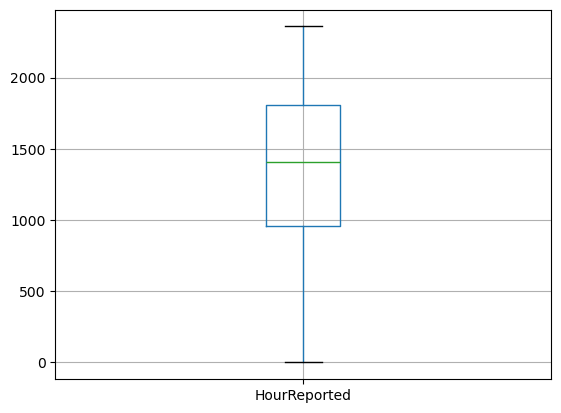

In [106]:
data.boxplot(column='HourReported')
plt.show()

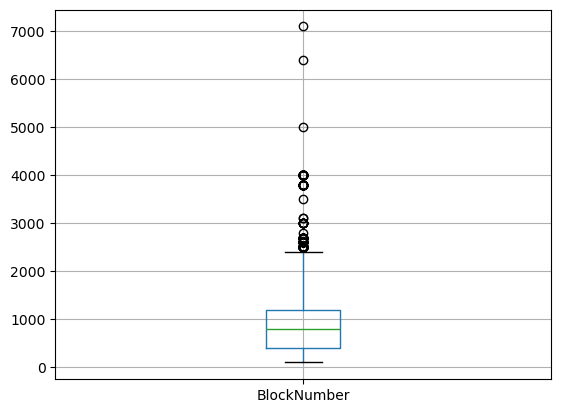

In [107]:
data.boxplot(column= 'BlockNumber')
plt.show()

here we can see some outliers

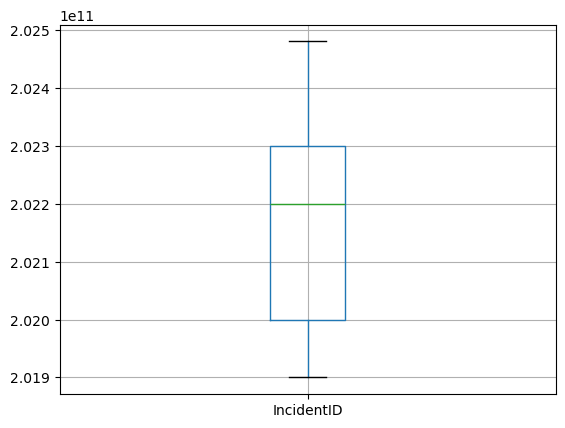

In [108]:
data.boxplot(column= 'IncidentID')
plt.show()

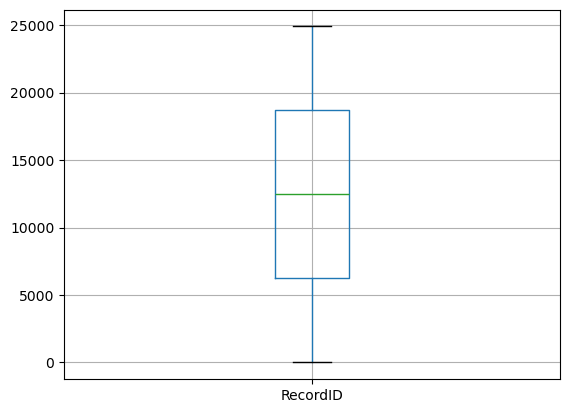

In [109]:
data.boxplot(column= 'RecordID')
plt.show()

we can the boxplot for all our data and pick them visualy or we can use statistical methods like `(zscore)` an save them to a var(outliers)and then drop them from the data set if necessary since in some cases we have to remove outliers since they can skew our data and affect the results but before we reomve the outliers we found we should standarize our data which reduces the impact of outliers then check if we should or should not remove the outliers

Now we do not have any missing data in our dataset and it is fully prepared and cleaned from missing data and duplicated all thats left is to store our new cleaned data in a new data set

In [110]:
data.to_csv('Cleaned_Crime_Data.csv',index=False)

In [111]:
new=pd.read_csv('Cleaned_Crime_Data.csv')

print(new.isna().sum())

RecordID            0
Offense             0
IncidentID          0
BlockNumber         0
StreetName          0
Agency              0
DateReported        0
HourReported        0
ReportingOfficer    0
dtype: int64


Using Data Wrangler extension on VS code we have made sure that we have cleaned the data successfully

**Team Project Task: Data Transformation**

lets read the new cleaned data:

In [112]:
data=pd.read_csv('Cleaned_Crime_Data.csv')
data.head(10)

RecordID                          Offense    IncidentID  BlockNumber  \
0         1  Assist Citizen - Mental/TDO/ECO  202400021514       1200.0   
1         2                      Hit and Run  202400021498        800.0   
2         3                   Assault Simple  202400021497        100.0   
3         4              Larceny - All Other  202400021465       1200.0   
4         5          Missing Person-juvenile  202400021456        500.0   
5         6              Larceny - All Other  202400021445        900.0   
6         7                   Assault Simple  202400021400        200.0   
7         8                      Hit and Run  202400021370       1700.0   
8         9           Forgery/Counterfeiting  202400021366        700.0   
9        10              Suspicious Activity  202400021359       1900.0   

      StreetName Agency            DateReported  HourReported  \
0         LEE ST    CPD  2024/06/28 03:24:32+00          2324   
1     CHERRY AVE    CPD  2024/06/28 00:16:15+00          2016   
2    E MARKET ST    CPD  2024/06/28 00:02:39+00          2002   
3     KENWOOD LN    CPD  2024/06/27 18:49:48+00          1449   
4        PARK ST    CPD  2024/06/27 17:06:05+00          1306   
5      E HIGH ST    CPD  2024/06/27 15:20:20+00          1120   
6   ROSSER AVE E    CPD  2024/06/27 03:53:19+00          2353   
7   HYDRAULIC RD    CPD  2024/06/26 22:02:55+00          1802   
8   ROSE HILL DR    CPD  2024/06/26 21:39:47+00          1739   
9  CHESAPEAKE ST    CPD  2024/06/26 20:52:19+00          1652   

    ReportingOfficer  
0   Khaleefa, Hamzeh  
1      Young, Steven  
2      Ryan, Matthew  
3      Hudson, Jesse  
4     Brannon, Devin  
5    Pendleton, Eric  
6     Wells, Matthew  
7      Hannay, Jacob  
8  Chabot, Katherine  
9      Hannay, Jacob

In [113]:
data['HourRepoerted_scaled']= StandardScaler().fit_transform(data[['HourReported']])
data['BlockNumber_scaled']= StandardScaler().fit_transform(data[['BlockNumber']])
display(data)

RecordID                          Offense    IncidentID  BlockNumber  \
0             1  Assist Citizen - Mental/TDO/ECO  202400021514       1200.0   
1             2                      Hit and Run  202400021498        800.0   
2             3                   Assault Simple  202400021497        100.0   
3             4              Larceny - All Other  202400021465       1200.0   
4             5          Missing Person-juvenile  202400021456        500.0   
...         ...                              ...           ...          ...   
24892     24893                        Vandalism  201900018309       1100.0   
24893     24894                Fraud-credit card  201900018297        600.0   
24894     24895                        Vandalism  201900018293       2000.0   
24895     24896              Suspicious Activity  201900018286       2300.0   
24896     24897        Death Investigation - DOA  201900018274        800.0   

            StreetName Agency            DateReported  HourReported  \
0               LEE ST    CPD  2024/06/28 03:24:32+00          2324   
1           CHERRY AVE    CPD  2024/06/28 00:16:15+00          2016   
2          E MARKET ST    CPD  2024/06/28 00:02:39+00          2002   
3           KENWOOD LN    CPD  2024/06/27 18:49:48+00          1449   
4              PARK ST    CPD  2024/06/27 17:06:05+00          1306   
...                ...    ...                     ...           ...   
24892      CARLTON AVE    CPD  2019/07/01 16:44:35+00          1244   
24893      E MARKET ST    CPD  2019/07/01 15:51:31+00          1151   
24894     MICHIE DR, H    CPD  2019/07/01 15:04:59+00          1104   
24895     HYDRAULIC RD    CPD  2019/07/01 13:39:02+00           939   
24896  MONTROSE AVE, A    CPD  2019/07/01 11:23:19+00           723   

         ReportingOfficer  HourRepoerted_scaled  BlockNumber_scaled  
0        Khaleefa, Hamzeh              1.660125            0.512707  
1           Young, Steven              1.136266           -0.142305  
2           Ryan, Matthew              1.112454           -1.288575  
3           Hudson, Jesse              0.171889            0.512707  
4          Brannon, Devin             -0.071331           -0.633563  
...                   ...                   ...                 ...  
24892    Johnston, Ernest             -0.176783            0.348954  
24893  Stayments, Ronald              -0.334962           -0.469811  
24894        Salyer, Jill             -0.414901            1.822729  
24895        Salyer, Jill             -0.695540            2.313988  
24896     Arreguin, Arron             -1.062922           -0.142305  

[24897 rows x 11 columns]

i only normalized the `("HourReported")` and `("BlockNumber")` column since the ("RecordID") we will not use it for Visualization and the rest are text values

after reading the data set we decided to pick the columns (`Offense`,`BlockNumber`,`StreetName`,`Agency`,`DateReported`,`ReportingOfficer`,`HourRepoerted_scaled`,`BlockNumber_scaled`)as for `IncidentID` and `RecordID` they are of no use for us so we can leave them as for `HourReported` and `BlcokNumber` we do not need them anymore since we have there scaled versions 

In [114]:
data=data[['Offense','StreetName','Agency','DateReported','ReportingOfficer','HourRepoerted_scaled','BlockNumber_scaled']]
data.head()

Offense   StreetName Agency  \
0  Assist Citizen - Mental/TDO/ECO       LEE ST    CPD   
1                      Hit and Run   CHERRY AVE    CPD   
2                   Assault Simple  E MARKET ST    CPD   
3              Larceny - All Other   KENWOOD LN    CPD   
4          Missing Person-juvenile      PARK ST    CPD   

             DateReported  ReportingOfficer  HourRepoerted_scaled  \
0  2024/06/28 03:24:32+00  Khaleefa, Hamzeh              1.660125   
1  2024/06/28 00:16:15+00     Young, Steven              1.136266   
2  2024/06/28 00:02:39+00     Ryan, Matthew              1.112454   
3  2024/06/27 18:49:48+00     Hudson, Jesse              0.171889   
4  2024/06/27 17:06:05+00    Brannon, Devin             -0.071331   

   BlockNumber_scaled  
0            0.512707  
1           -0.142305  
2           -1.288575  
3            0.512707  
4           -0.633563

i kept the `BlockNumber_scaled` since it can be used to identify which block is more dangoures than the other and which block has more crime density or something like that as for `Agency` it can be used to figure out the effeceincy and capabilities of defence agencies and for the `DateReported` it can be useful to identify patterns that we can use to find out if the crimes are connected and long ago using dates a serial killer was cought due to the time patterns of his killinh not inly that but also due to the area that the crimes he has done as well `StreetName` and `Offenses` the other columns can be deemed as useful as the others 

The `DateReported` column may be to hard to read for machine learning models even for us so it is better to break it down into multiple columns such as (`year`,`month`,`day`,`hour`) turning it into more of a numerical representation of a column 

In [115]:
data['Year'] = pd.DatetimeIndex(data['DateReported']).year
data['Month'] = pd.DatetimeIndex(data['DateReported']).month
data['Day'] = pd.DatetimeIndex(data['DateReported']).day
data['Hour'] = pd.DatetimeIndex(data['DateReported']).hour

data.head()

Offense   StreetName Agency  \
0  Assist Citizen - Mental/TDO/ECO       LEE ST    CPD   
1                      Hit and Run   CHERRY AVE    CPD   
2                   Assault Simple  E MARKET ST    CPD   
3              Larceny - All Other   KENWOOD LN    CPD   
4          Missing Person-juvenile      PARK ST    CPD   

             DateReported  ReportingOfficer  HourRepoerted_scaled  \
0  2024/06/28 03:24:32+00  Khaleefa, Hamzeh              1.660125   
1  2024/06/28 00:16:15+00     Young, Steven              1.136266   
2  2024/06/28 00:02:39+00     Ryan, Matthew              1.112454   
3  2024/06/27 18:49:48+00     Hudson, Jesse              0.171889   
4  2024/06/27 17:06:05+00    Brannon, Devin             -0.071331   

   BlockNumber_scaled  Year  Month  Day  Hour  
0            0.512707  2024      6   28     3  
1           -0.142305  2024      6   28     0  
2           -1.288575  2024      6   28     0  
3            0.512707  2024      6   27    18  
4           -0.633563  2024      6   27    17

we can even get the minutes and seconds as well but this is enough of data for us and i kept the `DateReported` col and did not drop it since we might still need it later on 

Now last but not least i would like to use one-hot encoding on `StreetName` and `Agency` since they are both categorical data and this can help machine learning models capture unique characteristics in both of them

In [116]:
data['StreetName'].value_counts()

StreetName
EMMET ST N            1262
W MAIN ST             1049
E MARKET ST           1013
E MAIN ST              511
5TH ST SW              473
                      ... 
NORWICH ST, 305          1
PRESTON AVE, 7B          1
CITY WALK WAY, 111       1
CITY WALK WAY, 207       1
FOREST ST, 3             1
Name: count, Length: 3821, dtype: int64

it seems that street name has alot of unique values **3821** to be exact which can reduce the effectivness due to Dimensionality Exlopsion where it creates a new feature for every unique value making the dataset very wide 

so we will do 1 hot ecoding for only the `agency` 

In [117]:
agency_onehot = pd.get_dummies(data['Agency'],dtype=int)
display(agency_onehot)


CPD
0        1
1        1
2        1
3        1
4        1
...    ...
24892    1
24893    1
24894    1
24895    1
24896    1

[24897 rows x 1 columns]

lets add this column to the dataset

In [118]:
data = pd.concat([data, agency_onehot], axis=1)
data.head()

Offense   StreetName Agency  \
0  Assist Citizen - Mental/TDO/ECO       LEE ST    CPD   
1                      Hit and Run   CHERRY AVE    CPD   
2                   Assault Simple  E MARKET ST    CPD   
3              Larceny - All Other   KENWOOD LN    CPD   
4          Missing Person-juvenile      PARK ST    CPD   

             DateReported  ReportingOfficer  HourRepoerted_scaled  \
0  2024/06/28 03:24:32+00  Khaleefa, Hamzeh              1.660125   
1  2024/06/28 00:16:15+00     Young, Steven              1.136266   
2  2024/06/28 00:02:39+00     Ryan, Matthew              1.112454   
3  2024/06/27 18:49:48+00     Hudson, Jesse              0.171889   
4  2024/06/27 17:06:05+00    Brannon, Devin             -0.071331   

   BlockNumber_scaled  Year  Month  Day  Hour  CPD  
0            0.512707  2024      6   28     3    1  
1           -0.142305  2024      6   28     0    1  
2           -1.288575  2024      6   28     0    1  
3            0.512707  2024      6   27    18    1  
4           -0.633563  2024      6   27    17    1

In [119]:
data.to_csv('Transformed_and_Cleaned_Crime_Data.csv',index=False)

**Team Project Task: Data Visualization and Summarization**

lets first load and read our cleaned and transformed dataset

In [120]:
data=pd.read_csv("Transformed_and_Cleaned_Crime_Data.csv",)
data.head()

Offense   StreetName Agency  \
0  Assist Citizen - Mental/TDO/ECO       LEE ST    CPD   
1                      Hit and Run   CHERRY AVE    CPD   
2                   Assault Simple  E MARKET ST    CPD   
3              Larceny - All Other   KENWOOD LN    CPD   
4          Missing Person-juvenile      PARK ST    CPD   

             DateReported  ReportingOfficer  HourRepoerted_scaled  \
0  2024/06/28 03:24:32+00  Khaleefa, Hamzeh              1.660125   
1  2024/06/28 00:16:15+00     Young, Steven              1.136266   
2  2024/06/28 00:02:39+00     Ryan, Matthew              1.112454   
3  2024/06/27 18:49:48+00     Hudson, Jesse              0.171889   
4  2024/06/27 17:06:05+00    Brannon, Devin             -0.071331   

   BlockNumber_scaled  Year  Month  Day  Hour  CPD  
0            0.512707  2024      6   28     3    1  
1           -0.142305  2024      6   28     0    1  
2           -1.288575  2024      6   28     0    1  
3            0.512707  2024      6   27    18    1  
4           -0.633563  2024      6   27    17    1

In data visualization our main goal is to communicate information and insights from data in a clear, concise, and intuitive way, using visual representations such as charts and graphs. 

lets see what years have recorded the highest number of crimes by plotting a histogram

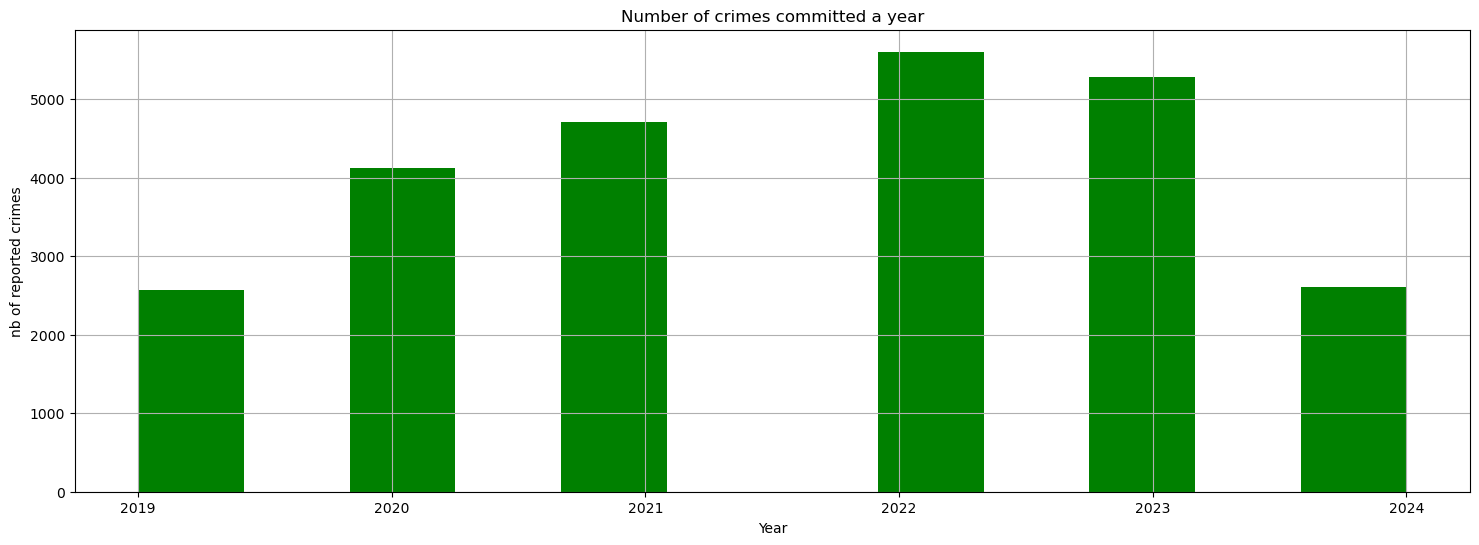

In [121]:
plt.figure(figsize=(18,6))
plt.hist(data['Year'],bins=12,color='green')
plt.grid()
plt.ylabel("nb of reported crimes")
plt.xlabel("Year")
plt.title("Number of crimes committed a year")
plt.show()

we can see that 2022 scored the highest number of crimes committed through out those 6 years and we can also see that from 2019 till 2022 the crime rate was increasing before it started to decrease to almost the same number in 2024 as it was in 2019

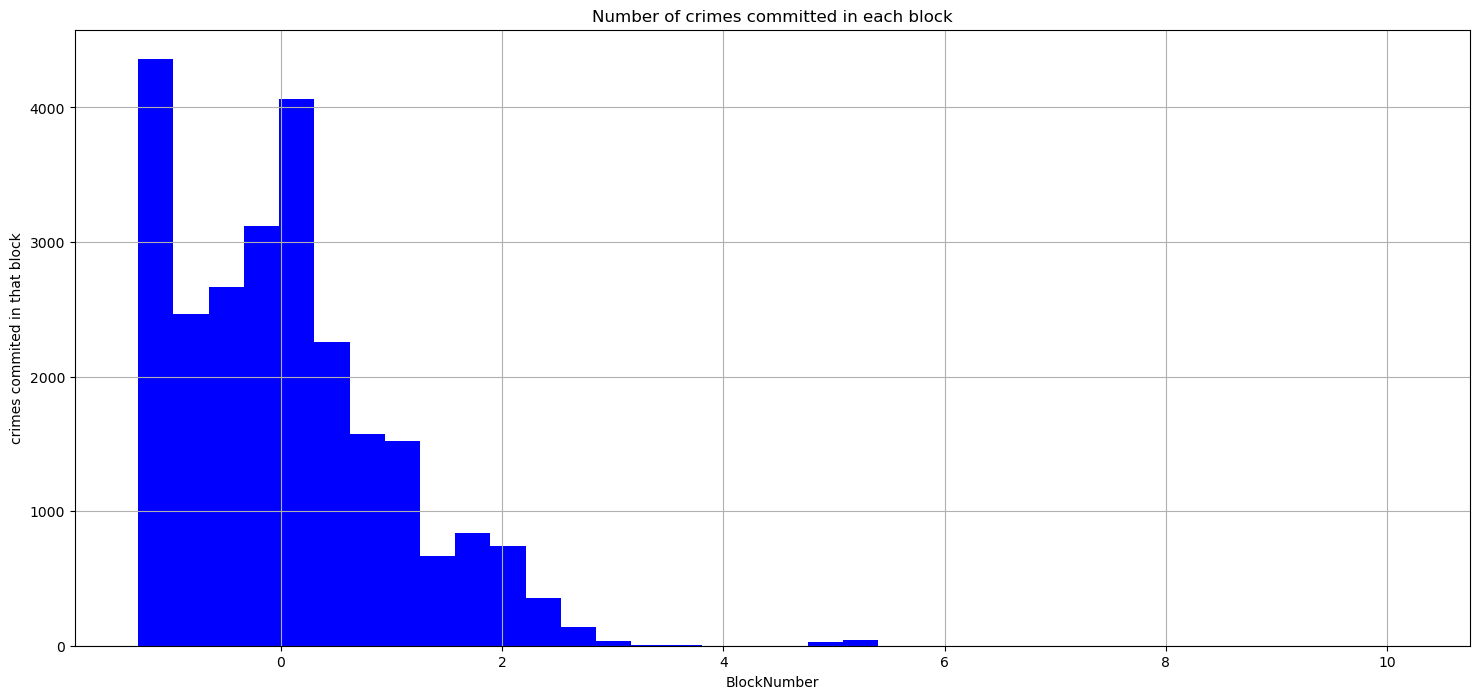

In [122]:
plt.figure(figsize=(18,8))
plt.hist(data['BlockNumber_scaled'],bins=36,color='blue')
plt.grid()
plt.ylabel("crimes commited in that block")
plt.xlabel("BlockNumber")
plt.title("Number of crimes committed in each block")
plt.show()

In [123]:
data['BlockNumber_scaled'].value_counts()

BlockNumber_scaled
-1.288575     2573
-1.124822     1787
 0.000000     1748
-0.142305     1630
-0.306058     1493
 0.348954     1471
-0.469811     1464
 0.021448     1257
-0.961069     1250
-0.797316     1218
-0.633563     1203
 0.185201     1061
 0.840212      916
 1.167718      850
 0.512707      788
 1.003965      671
 0.676459      661
 1.986482      558
 1.658977      488
 1.822729      348
 1.495224      346
 1.331471      320
 2.313988      249
 2.150235      184
 2.477741      108
 2.641494      100
 5.097787       42
 2.805247       39
 2.968999       33
 4.770281       26
 3.460258        8
 3.624011        2
 6.735315        1
 9.027855        1
 4.279022        1
 3.132752        1
 10.174125       1
Name: count, dtype: int64

we can see that blocknumber *-1.288575* is the so unsafe since it has the most number of crimes `2573` through out those 6 years and it might be better to increase patrol cars in that area to reduce the crime rate in that block as well as other blocks with number of crimes above *1000*

lets also check the `hours` of crime,types of `offense` and `officers` who reported those crimes

In [124]:
plt.figure(figsize=(36,12),dpi=1200)
plt.hist(data['Offense'],bins=112,color='black')
plt.grid()
plt.ylabel("types of crimes commited")
plt.xlabel("Offense")
plt.title("Number of crimes committed and each type")
plt.xticks(rotation=90,fontsize=6)
plt.show()

better observe the graph in expanded view

In [125]:
data['Offense'].value_counts()

Offense
Hit and Run                        2152
Assault Simple                     1925
Suspicious Activity                1690
Vandalism                          1630
Larceny - All Other                1495
                                   ... 
Tactical Crime Initiative - TCI       1
911 Investigation                     1
Alarm-Accidental                      1
Fire Code Violation                   1
Alarm - Unknown                       1
Name: count, Length: 112, dtype: int64

we can see that most offenses are hit and simple assaults

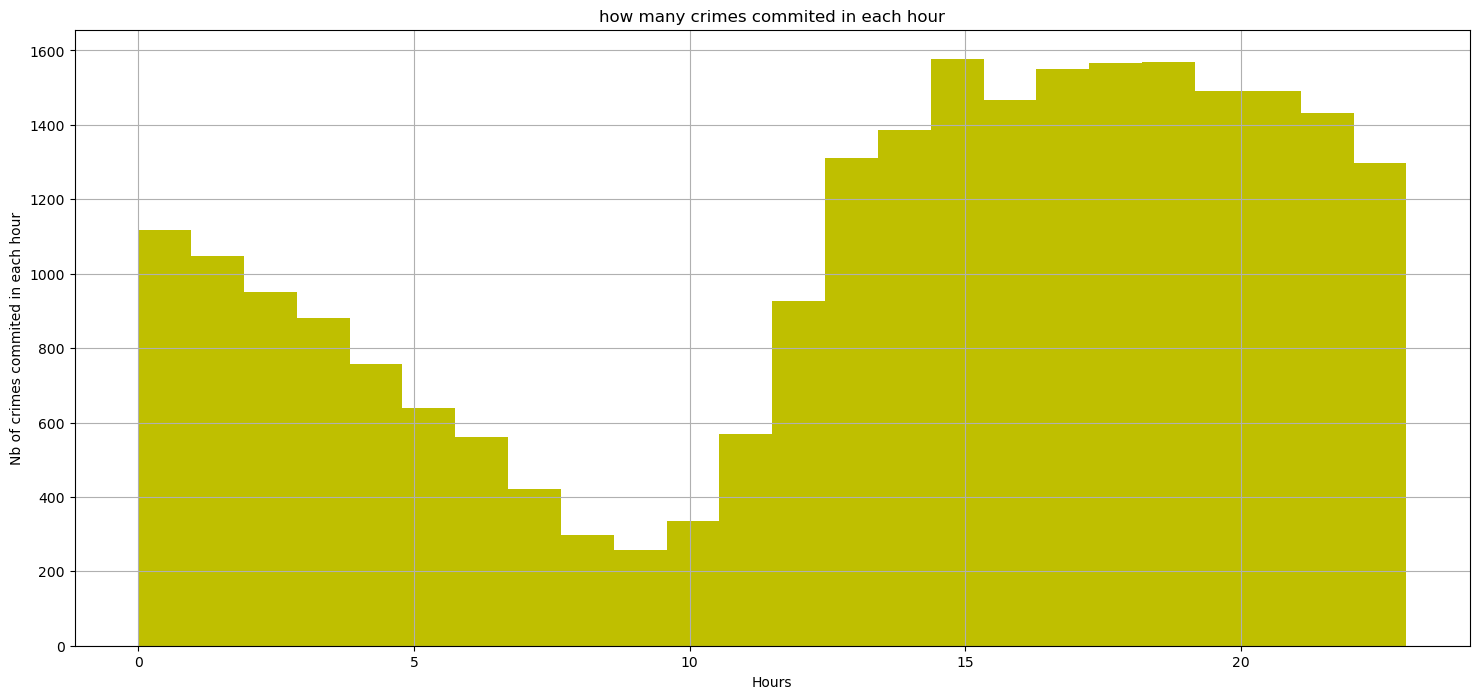

In [126]:
plt.figure(figsize=(18,8))
plt.hist(data['Hour'],bins=24,color='y')
plt.grid()
plt.ylabel("Nb of crimes commited in each hour")
plt.xlabel("Hours")
plt.title("how many crimes commited in each hour")
plt.show()

In [127]:
data['Hour'].value_counts()

Hour
15    1577
19    1568
18    1567
17    1551
21    1491
20    1490
16    1466
22    1433
14    1385
13    1311
23    1298
0     1118
1     1048
2      952
12     927
3      881
4      757
5      639
11     568
6      561
7      420
10     334
8      297
9      258
Name: count, dtype: int64

we can observe that most crimes have been commited at noon and around 11 am and 12 pm

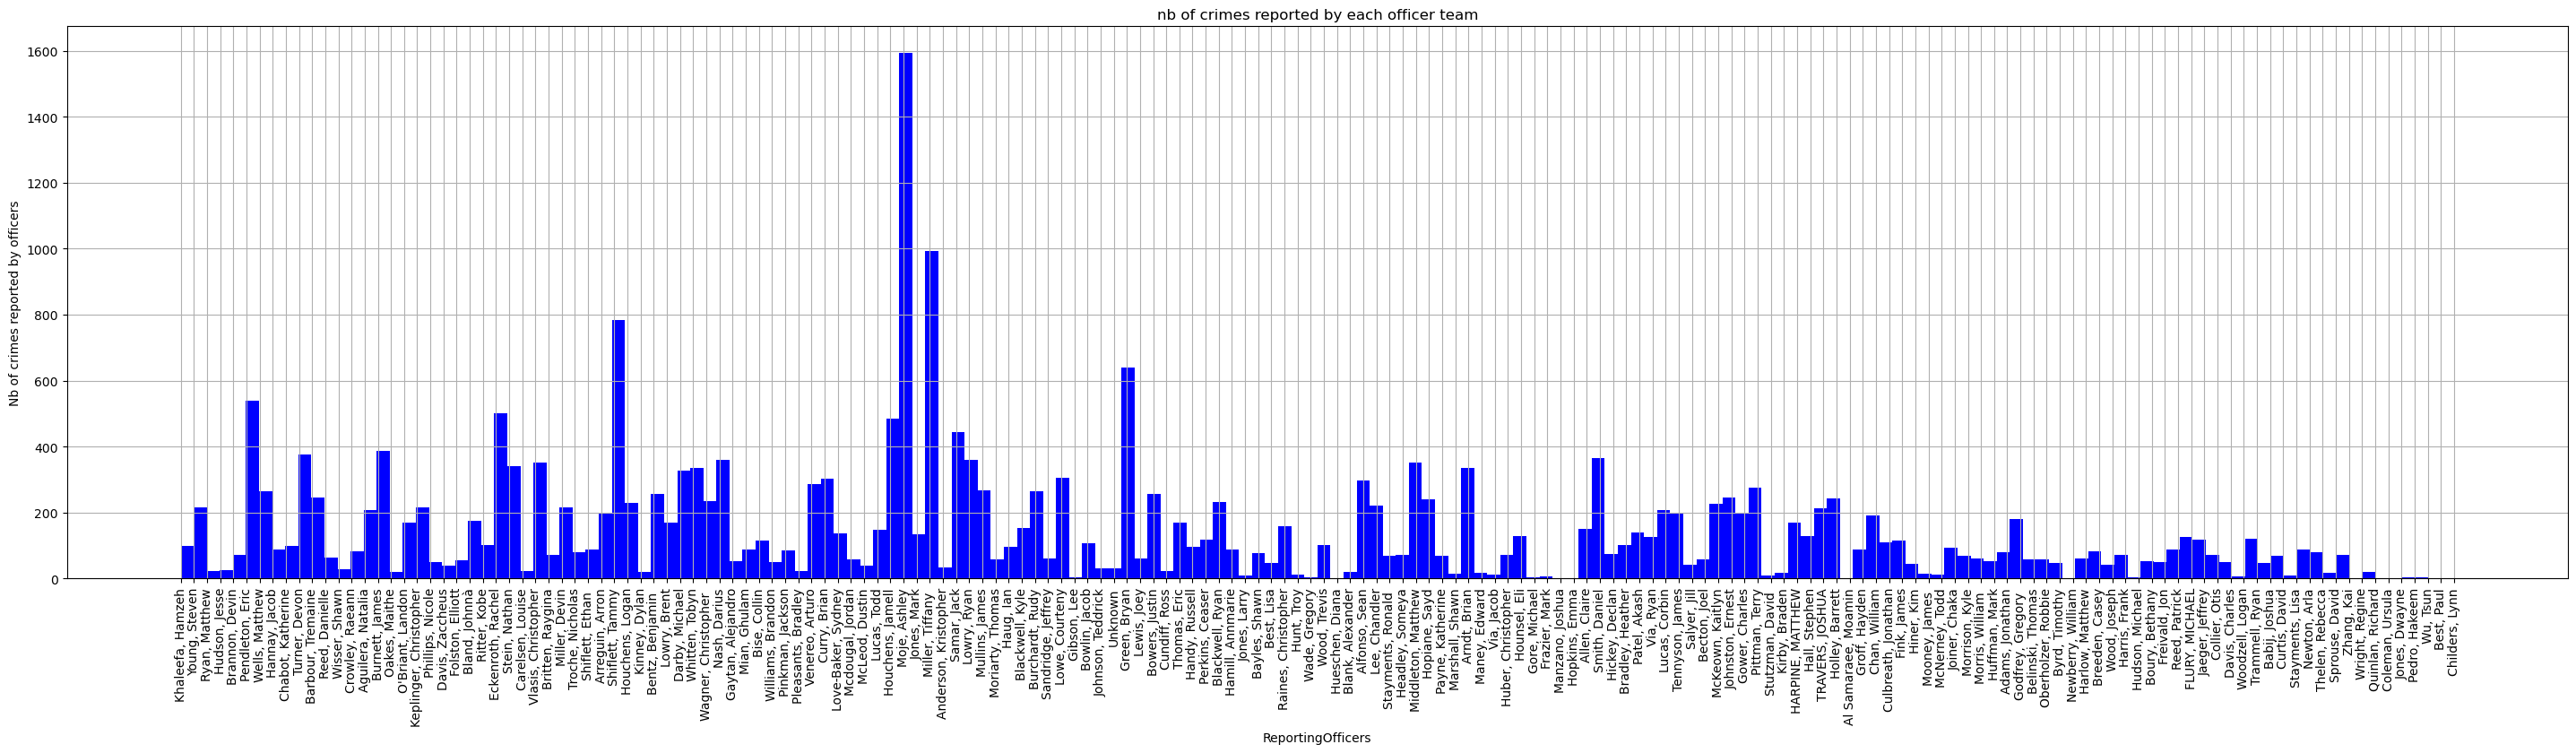

In [128]:
plt.figure(figsize=(36,8))
plt.hist(data['ReportingOfficer'],bins=174,color='b')
plt.grid()
plt.ylabel("Nb of crimes reported by officers")
plt.xlabel("ReportingOfficers")
plt.title("nb of crimes reported by each officer team")
plt.xticks(rotation=90)
plt.show()

In [129]:
data['ReportingOfficer'].value_counts()

ReportingOfficer
Moje, Ashley         1594
Miller, Tiffany       994
Shiflett, Tammy       783
Green, Bryan          640
Pendleton, Eric       539
                     ... 
Newberry, William       1
Coleman, Ursula         1
Jones, Dwayne           1
Manzano, Joshua         1
Best, Paul              1
Name: count, Length: 174, dtype: int64

`Moje and Ashley` deserve a raise they reported alot of crimes throughout those six years

In [130]:
data.describe()

HourRepoerted_scaled  BlockNumber_scaled          Year         Month  \
count          2.489700e+04        2.489700e+04  24897.000000  24897.000000   
mean          -1.592492e-16        8.875720e-17   2021.590915      6.583042   
std            1.000020e+00        1.000020e+00      1.498345      3.400584   
min           -2.292630e+00       -1.288575e+00   2019.000000      1.000000   
25%           -6.615232e-01       -7.973164e-01   2020.000000      4.000000   
50%            9.705200e-02       -1.423049e-01   2022.000000      7.000000   
75%            7.841919e-01        5.127065e-01   2023.000000     10.000000   
max            1.719655e+00        1.017413e+01   2024.000000     12.000000   

                Day          Hour      CPD  
count  24897.000000  24897.000000  24897.0  
mean      15.662289     13.412620      1.0  
std        8.834477      7.105974      0.0  
min        1.000000      0.000000      1.0  
25%        8.000000      7.000000      1.0  
50%       16.000000     15.000000      1.0  
75%       23.000000     19.000000      1.0  
max       31.000000     23.000000      1.0

i want to check the correlation between my data points so i will use the corr matrix

In [131]:
data_num=data[['HourRepoerted_scaled'	,'BlockNumber_scaled'	,'Year'	,'Month'	,'Day'	,'Hour'	,'CPD']]
corr_matrix=data_num.corr()
display(corr_matrix)

HourRepoerted_scaled  BlockNumber_scaled      Year  \
HourRepoerted_scaled              1.000000           -0.006037 -0.001888   
BlockNumber_scaled               -0.006037            1.000000  0.002924   
Year                             -0.001888            0.002924  1.000000   
Month                             0.003463           -0.010893 -0.303858   
Day                              -0.004149           -0.002380  0.003266   
Hour                              0.043106            0.007200  0.001153   
CPD                                    NaN                 NaN       NaN   

                         Month       Day      Hour  CPD  
HourRepoerted_scaled  0.003463 -0.004149  0.043106  NaN  
BlockNumber_scaled   -0.010893 -0.002380  0.007200  NaN  
Year                 -0.303858  0.003266  0.001153  NaN  
Month                 1.000000 -0.007360 -0.002938  NaN  
Day                  -0.007360  1.000000 -0.006174  NaN  
Hour                 -0.002938 -0.006174  1.000000  NaN  
CPD                        NaN       NaN       NaN  NaN

there does not seem to be any corr with any of our data points so we will assume that the relationships can be non-linear so we will a visualization technique `scatter plots`, to identify potential non-linear relationships.

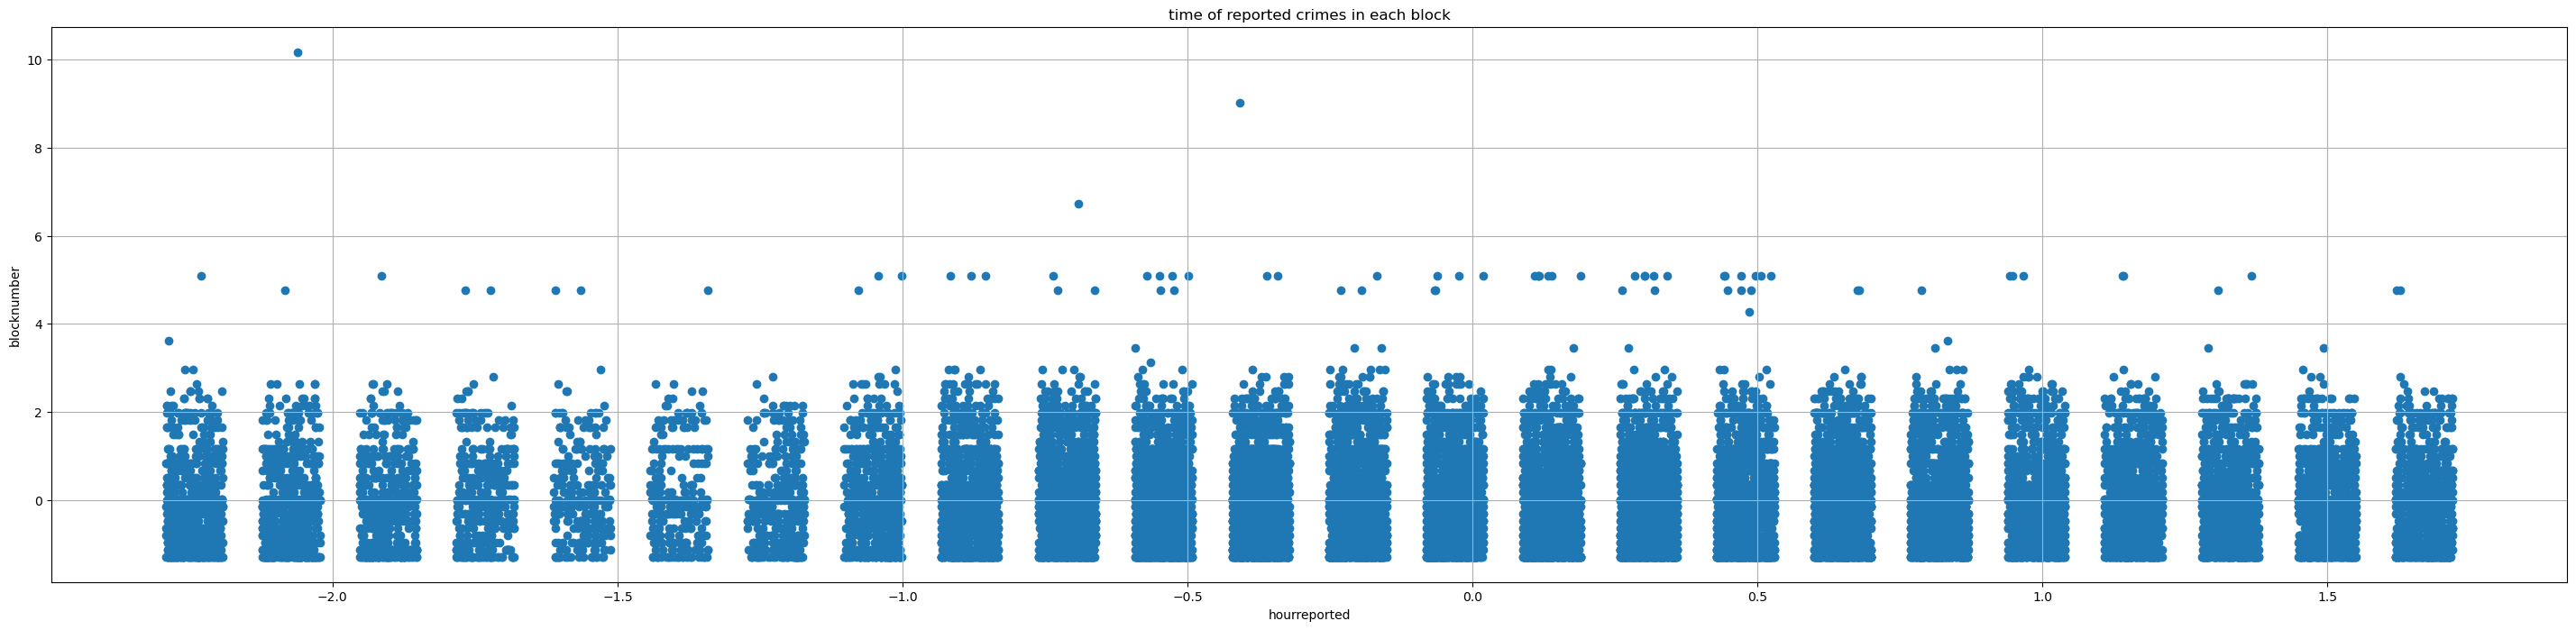

In [132]:
plt.figure(figsize=(36,8))
plt.scatter(data['HourRepoerted_scaled'],data['BlockNumber_scaled'])
plt.grid()
plt.ylabel("blocknumber")
plt.xlabel("hourreported")
plt.title("time of reported crimes in each block")
plt.show()

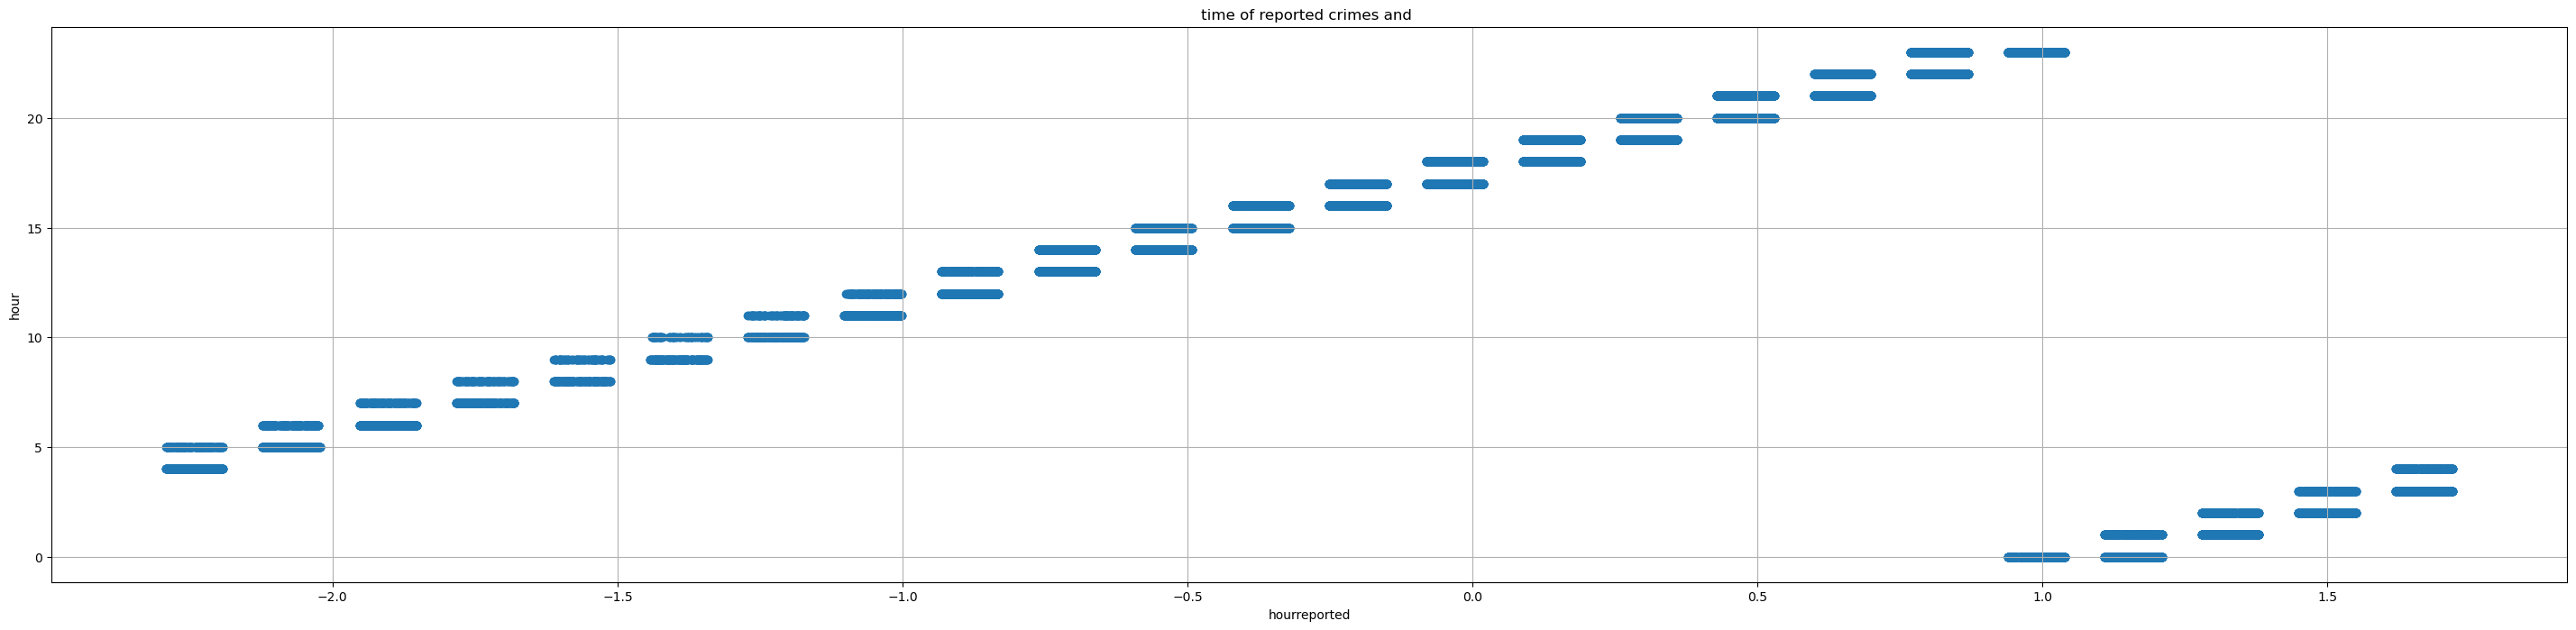

In [133]:
plt.figure(figsize=(36,8))
plt.scatter(data['HourRepoerted_scaled'],data['Hour'])
plt.grid()
plt.ylabel("hour")
plt.xlabel("hourreported")
plt.title("time of reported crimes and ")
plt.show()

it seems that our data is uninformative data which is data that does not provide any useful insights due to lack of relevant variables or poor data quality

**Team Project Task: Modeling**

given that our data above is uninformative and can not be used to bring about any insights we decided to get another data set from kaggle about the weather in sizged between 2006 and 2016 to analyze and compare real historical weather with weather folklore.

so lets read the data pick our predictors and our target and lets build this model

In [147]:
data=pd.read_csv('weatherHistory.csv')
data.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

lets pick the data we might use for observation

In [148]:
data_num2=data[['Temperature (C)',	'Apparent Temperature (C)',	'Humidity',	'Wind Speed (km/h)',	'Wind Bearing (degrees)',	'Visibility (km)',	'Loud Cover',	'Pressure (millibars)']]
data_num2.head()

Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         9.472222                  7.388889      0.89            14.1197   
1         9.355556                  7.227778      0.86            14.2646   
2         9.377778                  9.377778      0.89             3.9284   
3         8.288889                  5.944444      0.83            14.1036   
4         8.755556                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  
0                   251.0          15.8263         0.0               1015.13  
1                   259.0          15.8263         0.0               1015.63  
2                   204.0          14.9569         0.0               1015.94  
3                   269.0          15.8263         0.0               1016.41  
4                   259.0          15.8263         0.0               1016.51

now lets check out the corr matrix for this data

In [149]:
corr_matrix2=data_num2.corr()
display(corr_matrix2)

Temperature (C)  Apparent Temperature (C)  Humidity  \
Temperature (C)                  1.000000                  0.992629 -0.632255   
Apparent Temperature (C)         0.992629                  1.000000 -0.602571   
Humidity                        -0.632255                 -0.602571  1.000000   
Wind Speed (km/h)                0.008957                 -0.056650 -0.224951   
Wind Bearing (degrees)           0.029988                  0.029031  0.000735   
Visibility (km)                  0.392847                  0.381718 -0.369173   
Loud Cover                            NaN                       NaN       NaN   
Pressure (millibars)            -0.005447                 -0.000219  0.005454   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Temperature (C)                    0.008957                0.029988   
Apparent Temperature (C)          -0.056650                0.029031   
Humidity                          -0.224951                0.000735   
Wind Speed (km/h)                  1.000000                0.103822   
Wind Bearing (degrees)             0.103822                1.000000   
Visibility (km)                    0.100749                0.047594   
Loud Cover                              NaN                     NaN   
Pressure (millibars)              -0.049263               -0.011651   

                          Visibility (km)  Loud Cover  Pressure (millibars)  
Temperature (C)                  0.392847         NaN             -0.005447  
Apparent Temperature (C)         0.381718         NaN             -0.000219  
Humidity                        -0.369173         NaN              0.005454  
Wind Speed (km/h)                0.100749         NaN             -0.049263  
Wind Bearing (degrees)           0.047594         NaN             -0.011651  
Visibility (km)                  1.000000         NaN              0.059818  
Loud Cover                            NaN         NaN                   NaN  
Pressure (millibars)             0.059818         NaN              1.000000

we want to conclude the apparent tempeture which is how the temperature is felt opposing to how it truly is

so lets see the features that correlate the most with apparent temp

In [150]:
apparent_temp_corr=corr_matrix2['Apparent Temperature (C)']
apparent_temp_corr_sorted=apparent_temp_corr.sort_values(ascending=False)
top2_corr=apparent_temp_corr_sorted.nlargest(4)
display(top2_corr)

Apparent Temperature (C)    1.000000
Temperature (C)             0.992629
Visibility (km)             0.381718
Wind Bearing (degrees)      0.029031
Name: Apparent Temperature (C), dtype: float64

we can see that temperature and visibility have the highest corr we aparent temp so we will use them as predictors

In [151]:
X=data[['Temperature (C)','Visibility (km)']]
y=data['Apparent Temperature (C)']

In [152]:
display(X.head())
display(y.head())

Temperature (C)  Visibility (km)
0         9.472222          15.8263
1         9.355556          15.8263
2         9.377778          14.9569
3         8.288889          15.8263
4         8.755556          15.8263

0    7.388889
1    7.227778
2    9.377778
3    5.944444
4    6.977778
Name: Apparent Temperature (C), dtype: float64

now lets split our data into training and testing data using train_test_split lets import it first

In [153]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=314)


In [154]:
print(x_train.shape[0])
print(x_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

77162
19291
77162
19291


since predictors are on different scale we should standarize them

In [155]:
scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)
display(x_train)

Temperature (C)  Visibility (km)
14399         4.516667          14.9086
64234         2.111111          10.0303
63749         2.755556           0.1932
28678        -0.522222           7.9856
37233         7.822222           9.9820
...                ...              ...
11094         6.227778           7.7280
42931        11.355556           9.9820
44745        22.622222          11.2700
75373        18.655556          15.5204
14856        10.666667           5.1359

[77162 rows x 2 columns]

now lets import the linear model to build our model

In [156]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train_s,y_train)

LinearRegression()

now that we have our model lets calc the coef_ and intercept_ then test it 

In [157]:
print(model.coef_)

[10.63916672 -0.10785681]


In [158]:
print(model.intercept_)

10.834236267708054


lets scale x_test using the same scaler for the training data

In [159]:
x_test_s=scaler.fit_transform(x_test)

now lets use our model to get predictions

In [160]:
y_test_predicted= model.predict(x_test_s)

now we will make a scatterplot to check if our model fits well or not 

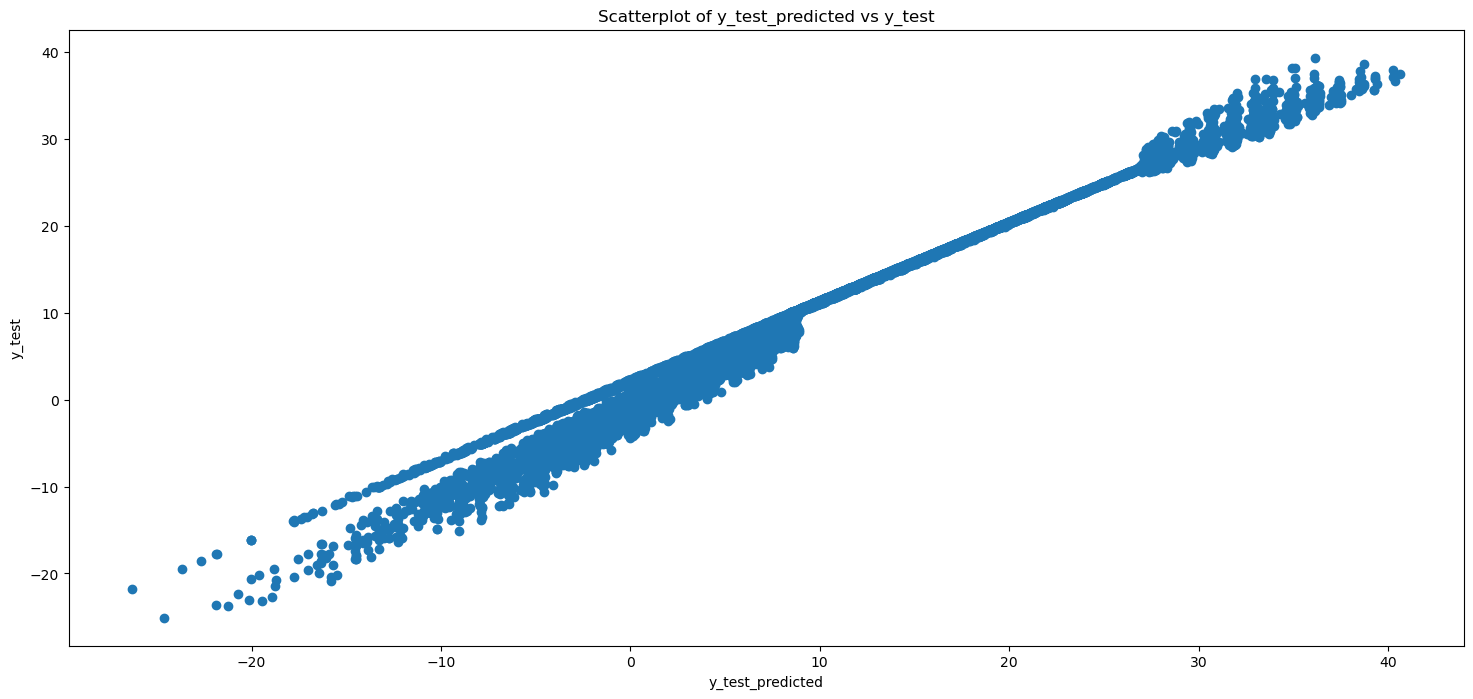

In [161]:
plt.figure(figsize=(18,8))
plt.scatter(y_test_predicted, y_test)
plt.xlabel("y_test_predicted")
plt.ylabel("y_test")
plt.title("Scatterplot of y_test_predicted vs y_test")
plt.show()

we can clearly see that our prediction almost perfectly match our actual data indecating that our model fits well

lets calc the r_squared to check and see if it agrees with our visualization

In [163]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_test_predicted))

0.985441576137972


the r_squared is so close to 1 which mean our model fits well which agrees with our visualization